Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling thenumerical features if necessary.

Q2. Split the dataset into a training set (70%) and a test set (30%).

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, 
and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [1]:
# Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling thenumerical features if necessary.
import pandas as pd

url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
df = pd.read_csv(url)

# Step 2: Handling missing values
# Impute missing values in numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Impute missing values in categorical columns with most frequent value
df.fillna(df.mode().iloc[0], inplace=True)

# Step 3: Encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

# Step 4: Split the dataset into features (X) and target (y)
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

# Step 5: Scale the numerical features using standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [2]:
# Q2. Split the dataset into a training set (70%) and a test set (30%).

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [3]:
# Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [4]:
# Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8131868131868132
Precision: 0.8367346938775511
Recall: 0.82
F1 Score: 0.8282828282828283


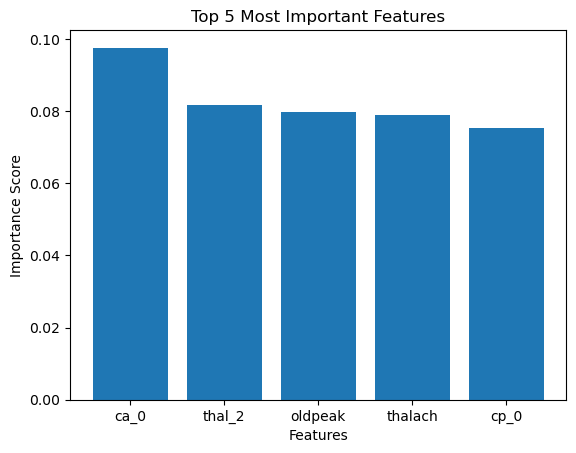

In [5]:
# Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

import matplotlib.pyplot as plt

feature_importance = rf_classifier.feature_importances_
feature_names = X.columns

top_5_indices = feature_importance.argsort()[-5:][::-1]
top_5_features = feature_names[top_5_indices]
top_5_importance = feature_importance[top_5_indices]

plt.bar(top_5_features, top_5_importance)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Top 5 Most Important Features")
plt.show()


In [6]:
# Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, 
#  and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.839202657807309


In [7]:
# Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

y_pred_best = best_rf_classifier.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print("Accuracy (Best Model):", accuracy_best)
print("Precision (Best Model):", precision_best)
print("Recall (Best Model):", recall_best)
print("F1 Score (Best Model):", f1_best)

print("Default Hyperparameters:")
print("Accuracy (Default Model):", accuracy)
print("Precision (Default Model):", precision)
print("Recall (Default Model):", recall)
print("F1 Score (Default Model):", f1)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy (Best Model): 0.8461538461538461
Precision (Best Model): 0.8461538461538461
Recall (Best Model): 0.88
F1 Score (Best Model): 0.8627450980392156
Default Hyperparameters:
Accuracy (Default Model): 0.8131868131868132
Precision (Default Model): 0.8367346938775511
Recall (Default Model): 0.82
F1 Score (Default Model): 0.8282828282828283


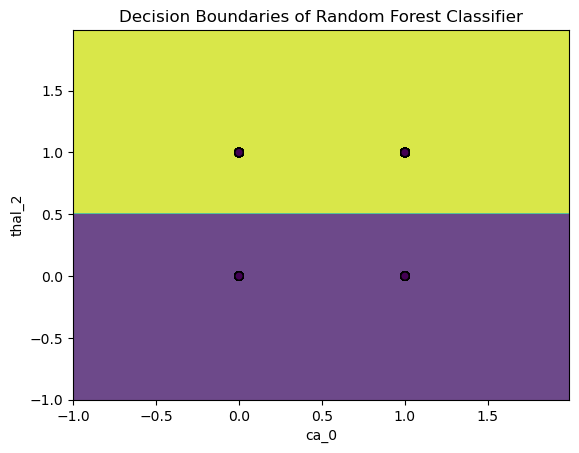

In [8]:
# Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

# Choose two of the most important features
feature1 = top_5_features[0]
feature2 = top_5_features[1]

# Get the corresponding columns from the original dataset
X_selected_features = df_encoded[[feature1, feature2]].values

# Train the random forest classifier using the selected features
rf_classifier_selected = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier_selected.fit(X_selected_features, y)

# Create a meshgrid of points to plot decision boundaries
import numpy as np

x_min, x_max = X_selected_features[:, 0].min() - 1, X_selected_features[:, 0].max() + 1
y_min, y_max = X_selected_features[:, 1].min() - 1, X_selected_features[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Make predictions on the meshgrid
Z = rf_classifier_selected.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_selected_features[:, 0], X_selected_features[:, 1], c=y, edgecolors='k')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Decision Boundaries of Random Forest Classifier")
plt.show()
